In [21]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup Selenium WebDriver
options = Options()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL and domain to crawl
domain = "www.grainger.com"
start_url = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?categoryIndex=6"

# Function to fetch HTML content from a URL using Selenium if needed
def fetch_html(url):
    try:
        print(f"Fetching URL: {url}")
        driver.get(url)
        # Wait for up to 10 seconds for the category list to appear
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'div.JnMlkm.NmndfD'))
        )
        html = driver.page_source
        if html:
            print(f"Fetched HTML from {url}")
            return html
        else:
            print(f"Page source is empty for {url}")
            return None
    except Exception as e:
        print(f"Error fetching URL {url}: {e}")
        return None

# Function to extract categories from HTML content
def extract_categories(html_content):
    categories = []
    if html_content:
        print("Extracting categories...")
        soup = BeautifulSoup(html_content, 'html.parser')
        div = soup.find('div', class_='JnMlkm NmndfD')
        if div:
            print("Found category list.")
            for li in div.find_all('li', class_='KmpkFF'):
                category = {}
                a = li.find('a', class_='HJvUEo')
                if a:
                    category['title'] = a.text.strip()
                    category['url'] = urljoin(start_url, a['href'])
                    categories.append(category)
                    print(f"Added category: {category['title']}")
                else:
                    print("Anchor tag not found for category.")
        else:
            print("Could not find the category list.")
    return categories

# Function to crawl starting from a URL
def crawl(url):
    print(f"Starting crawl from URL: {url}")
    html_content = fetch_html(url)
    if html_content:
        categories = extract_categories(html_content)
        for category in categories:
            print(f"Category: {category['title']}")
            print(f"Category URL: {category['url']}")

# Start crawling from the base URL
crawl(start_url)

# Quit the Selenium driver
driver.quit()


Starting crawl from URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?categoryIndex=6
Fetching URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?categoryIndex=6
Error fetching URL https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?categoryIndex=6: Message: 
Stacktrace:
0   chromedriver                        0x0000000105bba088 chromedriver + 5169288
1   chromedriver                        0x0000000105bb1f5a chromedriver + 5136218
2   chromedriver                        0x000000010572e36c chromedriver + 402284
3   chromedriver                        0x000000010577b740 chromedriver + 718656
4   chromedriver                        0x000000010577ba01 chromedriver + 719361
5   chromedriver                        0x00000001057c0bc4 chromedriver + 1002436
6   chromedriver                        

In [15]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [3]:
import pandas as pd
import os

# Create a list to store the text files
texts=[]

domain_dir = os.path.join("text", domain)
abs_domain_dir = os.path.abspath(domain_dir)

if os.path.exists(abs_domain_dir):
    # Get all the text files in the text directory
    for file in os.listdir("text/" + domain + "/"):
        
        try:
            # Open the file and read the text
            with open("text/" + domain + "/" + file, "r") as f:
                text = f.read()
        
                # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
                texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))
        except Exception as e:
            print(f"Exception occurred during reading file '{text}': {e}")       
else:
    print(f"Directory '{abs_domain_dir}' does not exist.")
# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

/var/folders/_x/sgylm_cs37zg8cfcxk6076bh0000gn/T/ipykernel_38427/2966875972.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,r.com,r.com.
1,r.com category furnishings appliances hospital...,r.com category furnishings appliances hospital...


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/anaconda3/envs/python-web-crawler-2/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

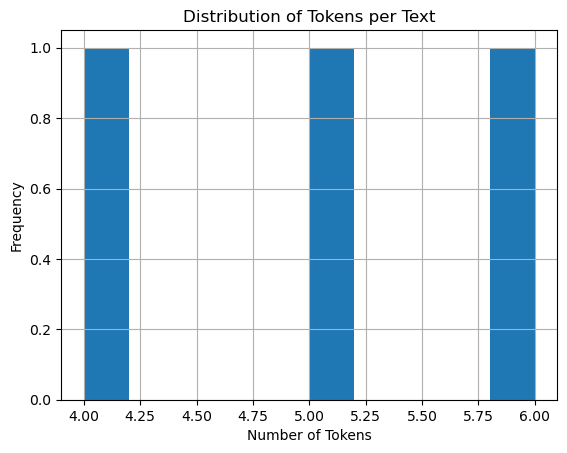

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer

# Assuming your dataframe 'df' is already created and contains a 'text' column
df = pd.DataFrame({
    'text': ["This is a sample text.", "Another example text.", "Yet another text sample."]
})

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Calculate the number of tokens for each text
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Tokens per Text')
plt.show()


In [27]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"
# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(1)  # Wait for the page to load
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")
        
        # Handle absolute URLs
        if re.search(r'^https?://', link):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(BASE_URL):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)
            # if not clean_link.startswith(BASE_URL):
            #     clean_link = None

        if clean_link is not None:
            print(f"Adding clean link: {clean_link}")
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    print(f"Clean links: {clean_links}")
    return list(set(clean_links))

# Function to crawl the website
def crawl(url):
    local_domain = urlparse(BASE_URL).netloc  # Extract domain name from BASE_URL
    queue = deque([url])
    seen = {url}

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while queue:
        url = queue.pop()
        print(f"Crawling URL: {url}")  # For debugging and to see the progress
        try:
            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(1)
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            for link in get_domain_hyperlinks(local_domain, url):
                if link not in seen:
                    queue.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")




# Start crawling from the base URL
crawl(START_URL)

driver.quit()


Crawling URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Getting hyperlinks for URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Found 1 hyperlinks on https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']
Crawling URL: https://www.grainger.com
Getting hyperlinks for URL: https://www.grainger.com
Found 1 hyperlinks on https://www.grainger.com
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']


In [22]:
from bs4 import BeautifulSoup
import requests

# Sample HTML content (trimmed for brevity)
html_content = """
<div class="zdGQVt">
   <aside id="filter-sidebar" class="Hnd2sz">
      <h2 class="BdV2B">Filters</h2>
   </aside>
   <div class="_3aIckp IBQ-S">
      <div id="category-container">
         <section data-testid="category-info">
            <p class="Gb4id">Dog Park Equipment</p>
         </section>
         <section data-testid="category-carousel">
            <ul data-testid="category-header-slides">
               <li>
                  <a href="https://www.grainger.com/product/ULTRAPLAY-Dog-Park-Kit-Doggie-Crawl-817KF7">ULTRAPLAY Dog Park Kit: Doggie Crawl/Hoop Jump/Paws Table/Rover Jump Over</a>
               </li>
               <li>
                  <a href="https://www.grainger.com/product/ULTRAPLAY-Dog-Park-Kit-Doggie-Crawl-817KF8">Another Product</a>
               </li>
               <!-- Additional <li> elements for other products -->
            </ul>
         </section>
      </div>
      <div id="collection-164355">
         <ul class="fLkZ0b">
            <li>
               <a href="https://www.grainger.com/product/ULTRAPLAY-Dog-Park-Kit-Doggie-Crawl-817KF7">ULTRAPLAY Dog Park Kit: Doggie Crawl/Hoop Jump/Paws Table/Rover Jump Over</a>
            </li>
            <!-- Additional <li> elements for products in this collection -->
         </ul>
      </div>
   </div>
</div>
"""

def extract_links(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    links = []

    # Extract links from category-carousel section
    category_carousel = soup.find('section', {'data-testid': 'category-carousel'})
    if category_carousel:
        for li in category_carousel.find_all('li'):
            link = li.find('a')
            if link and link.has_attr('href'):
                links.append(link['href'])

    # Extract links from collection-164355 section
    collection_section = soup.find('div', {'id': 'collection-164355'})
    if collection_section:
        for li in collection_section.find_all('li'):
            link = li.find('a')
            if link and link.has_attr('href'):
                links.append(link['href'])

    return links

# Function to check links
def check_links(links):
    results = {}
    for link in links:
        try:
            response = requests.head(link, allow_redirects=True)
            results[link] = response.status_code
        except requests.RequestException as e:
            results[link] = str(e)
    return results

# Extract links from HTML content
extracted_links = extract_links(html_content)

# Check status of extracted links
link_status = check_links(extracted_links)

# Print results
for link, status in link_status.items():
    print(f"Link: {link}, Status Code: {status}")


Link: https://www.grainger.com/product/ULTRAPLAY-Dog-Park-Kit-Doggie-Crawl-817KF7, Status Code: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Link: https://www.grainger.com/product/ULTRAPLAY-Dog-Park-Kit-Doggie-Crawl-817KF8, Status Code: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


In [28]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(1)  # Wait for the page to load
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")
        
        # Handle absolute URLs
        if re.search(r'^https?://', link):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(BASE_URL):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)

        if clean_link is not None and clean_link not in clean_links:
            print(f"Adding clean link: {clean_link}")
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    print(f"Clean links: {clean_links}")
    return list(set(clean_links))

# Function to crawl the website
def crawl(url):
    local_domain = urlparse(BASE_URL).netloc
    queue = deque([url])
    seen = {url}

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while queue:
        url = queue.popleft()  # Use popleft to ensure we process URLs in a breadth-first manner
        print(f"Crawling URL: {url}")
        try:
            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(1)
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            for link in get_domain_hyperlinks(local_domain, url):
                if link not in seen:
                    queue.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")

# Start crawling from the base URL
crawl(START_URL)

driver.quit()


Crawling URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Getting hyperlinks for URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Found 1 hyperlinks on https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']
Crawling URL: https://www.grainger.com
Getting hyperlinks for URL: https://www.grainger.com
Found 1 hyperlinks on https://www.grainger.com
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']


In [30]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"

# Function to get the hyperlinks from a URL using Selenium
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(3)  # Adjust wait time as needed based on page load speed
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")
        
        # Handle absolute URLs
        if link.startswith("http"):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(BASE_URL):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)

        if clean_link is not None and clean_link not in clean_links:
            print(f"Adding clean link: {clean_link}")
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    print(f"Clean links: {clean_links}")
    return list(set(clean_links))

# Function to crawl the website
def crawl(url):
    local_domain = urlparse(BASE_URL).netloc
    queue = deque([url])
    seen = {url}

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while queue:
        url = queue.popleft()  # Use popleft to ensure we process URLs in a breadth-first manner
        print(f"Crawling URL: {url}")
        try:
            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(3)  # Adjust wait time as needed based on page load speed
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            for link in get_domain_hyperlinks(local_domain, url):
                if link not in seen:
                    queue.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")

# Start crawling from the base URL
crawl(START_URL)

driver.quit()



Crawling URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Getting hyperlinks for URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Found 1 hyperlinks on https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']
Crawling URL: https://www.grainger.com
Getting hyperlinks for URL: https://www.grainger.com
Found 1 hyperlinks on https://www.grainger.com
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']


In [31]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"

# Function to get the hyperlinks from a URL using Selenium
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(3)  # Adjust wait time as needed based on page load speed
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to get specific links using XPath
def get_specific_links(xpath):
    try:
        elements = driver.find_elements_by_xpath(xpath)
        links = [element.get_attribute('href') for element in elements]
        return links
    except Exception as e:
        print(f"Error getting specific links: {e}")
        return []

# Function to crawl the website
def crawl(url):
    local_domain = urlparse(BASE_URL).netloc
    queue = deque([url])
    seen = {url}

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while queue:
        url = queue.popleft()  # Use popleft to ensure we process URLs in a breadth-first manner
        print(f"Crawling URL: {url}")
        try:
            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(3)  # Adjust wait time as needed based on page load speed
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
                
                # Example: Extracting specific links using XPath
                specific_xpath = '//*[@id="collection-164356"]/div[2]/div/ul/li/div/div/div[1]/div[1]/a'
                specific_links = get_specific_links(specific_xpath)
                print(f"Specific links found: {specific_links}")
                
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            for link in get_domain_hyperlinks(local_domain, url):
                if link not in seen:
                    queue.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")
        
        # Handle absolute URLs
        if link.startswith("http"):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(BASE_URL):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)

        if clean_link is not None and clean_link not in clean_links:
            print(f"Adding clean link: {clean_link}")
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    print(f"Clean links: {clean_links}")
    return list(set(clean_links))

# Start crawling from the base URL
crawl(START_URL)

driver.quit()


Crawling URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Error getting specific links: 'WebDriver' object has no attribute 'find_elements_by_xpath'
Specific links found: []
Getting hyperlinks for URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Found 1 hyperlinks on https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']
Crawling URL: https://www.grainger.com
Error getting specific links: 'WebDriver' object has no attribute 'find_elements_by_xpath'
Specific links found: []
Getting hyperlinks for URL: https://www.grainger.com
Found 1 hyper

In [32]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"

# Function to get specific links using XPath
def get_specific_links(xpath):
    try:
        elements = driver.find_elements_by_xpath(xpath)
        links = [element.get_attribute('href') for element in elements]
        return links
    except Exception as e:
        print(f"Error getting specific links: {e}")
        return []

# Example usage
specific_xpath = '//*[@id="collection-164356"]/div[2]/div/ul/li/div/div/div[1]/div[1]/a'
specific_links = get_specific_links(specific_xpath)
print(f"Specific links found: {specific_links}")

driver.quit()


Error getting specific links: 'WebDriver' object has no attribute 'find_elements_by_xpath'
Specific links found: []


In [33]:
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Check WebDriver version to ensure compatibility
driver_version = driver.capabilities['browserVersion']
print(f"Selenium WebDriver Version: {driver_version}")

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Base URL to ensure crawling stays within this path
BASE_URL = "https://www.grainger.com"
START_URL = "https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236"

# Function to get the hyperlinks from a URL using Selenium
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(3)  # Adjust wait time as needed based on page load speed
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to get specific links using XPath
def get_specific_links(xpath):
    try:
        elements = driver.find_elements_by_xpath(xpath)
        links = [element.get_attribute('href') for element in elements]
        return links
    except Exception as e:
        print(f"Error getting specific links: {e}")
        return []

# Function to crawl the website
def crawl(url):
    local_domain = urlparse(BASE_URL).netloc
    queue = deque([url])
    seen = {url}

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while queue:
        url = queue.popleft()  # Use popleft to ensure we process URLs in a breadth-first manner
        print(f"Crawling URL: {url}")
        try:
            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(3)  # Adjust wait time as needed based on page load speed
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
                
                # Example: Extracting specific links using XPath
                specific_xpath = '//*[@id="collection-164356"]/div[2]/div/ul/li/div/div/div[1]/div[1]/a'
                specific_links = get_specific_links(specific_xpath)
                print(f"Specific links found: {specific_links}")
                
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            for link in get_domain_hyperlinks(local_domain, url):
                if link not in seen:
                    queue.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")
        
        # Handle absolute URLs
        if link.startswith("http"):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(BASE_URL):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)

        if clean_link is not None and clean_link not in clean_links:
            print(f"Adding clean link: {clean_link}")
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    print(f"Clean links: {clean_links}")
    return list(set(clean_links))

# Start crawling from the base URL
crawl(START_URL)

driver.quit()


Selenium WebDriver Version: 126.0.6478.63
Crawling URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Error getting specific links: 'WebDriver' object has no attribute 'find_elements_by_xpath'
Specific links found: []
Getting hyperlinks for URL: https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Found 1 hyperlinks on https://www.grainger.com/category/furnishings-appliances-hospitality/fitness-sports-recreation/dog-park-equipment?filters=webParentSkuKey&webParentSkuKey=WP15398236
Checking link: /
Adding clean link: https://www.grainger.com/
Clean links: ['https://www.grainger.com']
Crawling URL: https://www.grainger.com
Error getting specific links: 'WebDriver' object has no attribute 'find_elements_by_xpath'
Specific links found: []
Getting hyperlinks for U